# Load FIRE Data

In [2]:
# Import the main analysis module
import gizmo_analysis as gizmo

In [3]:
# Choose the simulation directory
#simulation_directory = '/Users/andreweden/Desktop/ANANKE/m12i_res7100'
simulation_directory = '/Volumes/Haven/m12i_res7100'

In [4]:
# read star particles and gas cells at z = 0
# use particle_subsample_factor to periodically sub-sample particles, to save memory
part = gizmo.io.Read.read_snapshots(['star', 'gas' ], 'redshift', 0, simulation_directory, particle_subsample_factor=10)


# in utilities.simulation.Snapshot():
* reading:  Volumes/Haven/m12i_res7100/snapshot_times.txt

* input redshift = 0:  using snapshot index = 600, redshift = 0.000


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  Volumes/Haven/m12i_res7100/output/snapdir_600/snapshot_600.0.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 70514272 particles
    dark2     (id = 2): 5513331 particles
    gas       (id = 0): 57060074 particles
    star      (id = 4): 13976485 particles
    blackhole (id = 5): 0 particles

* reading the following
  species: ['star', 'gas']

* reading particles from:
    snapshot_600.0.hdf5
    snapshot_600.1.hdf5
    snapshot_600.2.hdf5
    snapshot_600.3.hdf5

! cannot find MUSIC config file:  Volumes/Haven/m12i_res7100/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* periodically subsampling all particles 

# Sample Image

In [5]:
# Import matplotlib and numpy libraries
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [6]:
# These are coordinates relative to the central galaxy
coordinates = part['gas'].prop( 'host.distance' )

# This is distance to the center of the central galaxy
distance_to_center = part['gas'].prop( 'host.distance.total' )

# An approximate definition for being in the galaxy: particles within 10 kpc of the center
is_in_galaxy = distance_to_center < 10.

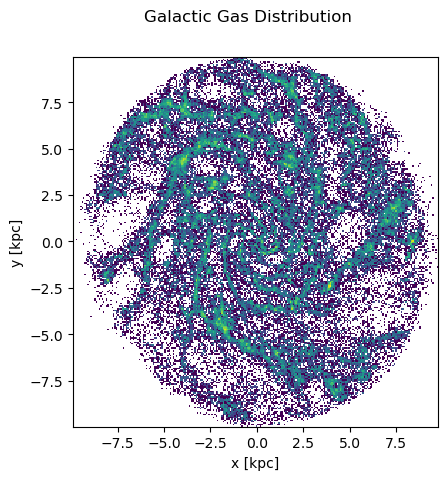

In [7]:
# Plot the logarithmically normalized count of the gas particles at each coordinate
fig = plt.figure()
ax = plt.gca()

ax.hist2d(
    coordinates[:,0][is_in_galaxy],
    coordinates[:,1][is_in_galaxy],
    bins = 256,
    norm = matplotlib.colors.LogNorm(),
)

ax.set_xlabel( r'x [kpc]' )
ax.set_ylabel( r'y [kpc]' )

ax.set_aspect( 'equal' )

fig.suptitle("Galactic Gas Distribution");

# EnBiD (no longer used)

In [8]:
#import EnBiD

In [9]:
# Find rho through EnBiD
# name = 'demo'
# rho = EnBiD.enbid(part['star'].prop('host.distance'), part['star'].prop('host.velocity'), name=name)

In [10]:
#name = 'demo1'
#rho1 = EnBiD.enbid(part['star'].prop('host.distance'), name=name)

In [11]:
#name = 'demo2'
#rho2 = EnBiD.enbid(part['star'].prop('host.velocity'), name=name)

# Galaxia (no longer used)

In [12]:
#import Galaxia 
#import numpy as np

In [13]:
# Make a survey using LSST

# fsample reduces the sampling size for faster survey generation
# cmd_magnames constrains the magnitudes
# photo_sys defines the telescope/system used as reference 
# the remaining parameters are modified within **kwargs
# note: the default params that reappeared in survey_parapms_lsst were not restated
#output = Galaxia.make_survey_from_particles(p, rho1, rho2, fsample=0.01, photo_sys='padova/LSST', cmd_magnames='rmag,gmag-rmag'
#                                            , app_mag_lim_lo=20, app_mag_lim_hi=24, abs_mag_lim_lo=-7.0, abs_mag_lim_hi=10.0
#                                            , color_lim_lo=-1000, color_lim_hi=1000, surveyArea=360, r_max=1000
#                                            , longitude=90, latitude=0)

# Questions: color/mag limits, surveyArea (default=207.455), rmax (default=500)

# Ananke

In [14]:
# Create p dictionary to store particle data
p = {}
p['pos3'] = part['star'].prop('host.distance')       # position in kpc
p['vel3'] = part['star'].prop('host.velocity')       # velocity in km/s
p['mass'] = part['star']['mass']                     # mass in solar masses
p['age'] = part['star'].prop('age')                  # log age in Gyr
p['feh'] = part['star'].prop('metallicity.fe')       # [Fe/H]
p['helium'] = part['star'].prop('metallicity.he')    # [He/H]
p['carbon'] = part['star'].prop('metallicity.c')     # [C/H]
p['nitrogen'] = part['star'].prop('metallicity.n')   # [N/H]
p['neon'] = part['star'].prop('metallicity.ne')      # [Ne/H]
p['magnesium'] = part['star'].prop('metallicity.mg') # [Mg/H]
p['silicon'] = part['star'].prop('metallicity.si')   # [Si/H]
p['sulphur'] = part['star'].prop('metallicity.s')    # [S/H]
p['calcium'] = part['star'].prop('metallicity.ca')   # [Ca/H]
p['oxygen'] = part['star'].prop('metallicity.o')     # [O/H]
p['alpha'] = part['star'].prop('metallicity.mg - metallicity.fe')  # [Mg/Fe]
p['parentid'] = part['star']['id'] # indices of parent particles in snapshot (may need to be id.child or id.generation)
p['dform'] = np.zeros(part['star']['position'].shape[0], dtype='float32')  # dummy variable for now

In [15]:
import ananke as an
name='sim'
ananke = an.Ananke(p, name, fsample=0.01, photo_sys='padova/LSST', cmd_magnames='rmag,gmag-rmag'
                                            , app_mag_lim_lo=20, app_mag_lim_hi=24, abs_mag_lim_lo=-7.0, abs_mag_lim_hi=10.0
                                            , color_lim_lo=-1000, color_lim_hi=1000, surveyArea=360, r_max=1000
                                            , longitude=90, latitude=0)
ananke.run()

AttributeError: module 'ananke' has no attribute 'Ananke'

# Survey

In [ ]:
# Make a survey using LSST
survey = ananke._output
survey._vaex

# Graph Survey Data

In [ ]:
# Import libraries for plotting 
import vaex
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Store survey vaex table in variable df
df = survey._vaex
type(df)

In [ ]:
# Get the names of all columns in the survey
column_names = df.get_column_names()
print(column_names)

In [ ]:
# Create an array of descriptions for each graph (descriptions[i] for graph i)
descriptions = [
    "Age, log (age/yr)",
    "Alpha abundance, [alpha/Fe]",
    "Declination, degree",
    "Dmod",
    "Metallicity, [Fe/H]",
    "Galacitic latitude, degree",
    "Galacitic longitude, degree",
    "Surface gravity, log(gravity)",
    "Gmag",
    "Imag",
    "Rmag",
    "Umag",
    "Ymag",
    "Zmag",
    "Lum",
    "Actual solar mass, M_solar",
    "Mass at the giant branch tip, M_solar",
    "      Parent particle #",
    "0 if at parent coords, else 1",
    "Position x, heliocentric, kpc",
    "Position y, heliocentric, kpc",
    "Position z, heliocentric, kpc",
    "Right Ascension, degree",
    "Radial distance, kpc",
    "Initial stellar mass, M_solar",
    "Effective Temperature, log(T/Kelvin)",
]

In [ ]:
# Declare the number of graphs to plot based on the number of columns in the survey
n_cols = len(column_names)

# Declare how many graphs to plot in each subplot
n_subplots = 4  

# Loop over the columns and create a histogram for each one
for i, col in enumerate(column_names):
    # Check if a new subplot must be created
    if i % n_subplots == 0:
        # Create a new subplot 
        fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3), sharey=True)
        # Increase width between plots in subplots
        plt.subplots_adjust(wspace=0.4)
    
    # Calculate the current placement of the plot in the subplot
    col_index = i % n_subplots
    
    # Create histogram 
    axes[col_index].hist(df[col].values, bins = 100, histtype='step')
    
    # Add lablels
    axes[col_index].set_xlabel(col)
    axes[col_index].set_ylabel("Frequency")
    
    # Add descriptions
    if i < len(descriptions):
        axes[col_index].text(0.05, -0.4, descriptions[i], transform=axes[col_index].transAxes)
    else:
        axes[col_index].text(0.05, -0.4, 'No description available', transform=axes[col_index].transAxes)
    
    
    # Unify y axis since they're all on the same scale (share y in matplot lib)
    # Change binning 
    # Use step histogram to hide color fill
    # Try to combine plots (by same units)

In [ ]:
# Plot Magnitudes


In [ ]:
# Plot RA vs DEC
df.plot(x='ra', y='dec', title='RA vs DEC')
plt.show()

# Find how to plot Ra with astropy
# Activate grid 

In [ ]:
# Plot Galactic Latitude vs Longitude
df.plot(x='glon', y='glat', title='Galactic Latitude vs Longitude')
plt.show()

# Plot lon from -180 to 180
# Combine the lats/long with ra dec since they're on the same scale

In [ ]:
%%time

# Plot Heliocentric Position from px py pz
x = df['px'].values
y = df['py'].values
z = df['pz'].values

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)
ax.set_xlabel('X (kpc)')
ax.set_ylabel('Y (kpc)')
ax.set_zlabel('X (kpc)')
ax.set_title('Heliocentric Position')
# Add origin
ax.scatter([0], [0], [0], color='red', s=100)
plt.show()

# Find how to interact

# TODO:
- Run EnBiD and Galaxia through Ananke instead of independently
- Apply Vera Rubin (LSST) parameters by manually imputting keyword args into make_survey_from_particles (see __init__.py and constants.py)
- Write a script to automatically add the kwdargs into make_survey_from_particles